Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/emails.csv')
df.shape

(5728, 2)

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**1. Data Cleaning**

In [ ]:
df.info

<bound method DataFrame.info of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

In [ ]:
## Checking Missing Values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
##Check for Duplicated Values
df.duplicated().sum()

33

In [ ]:
##Remove Duplicates
df = df.drop_duplicates(keep='first')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.shape

(5695, 2)

In [ ]:
df.duplicated().sum()

0

**2. EDA**

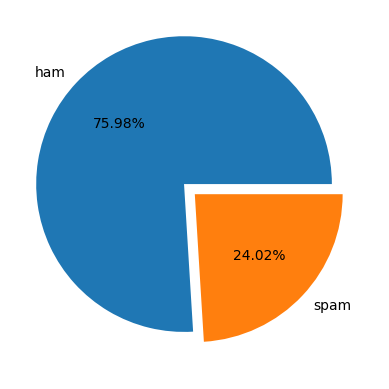

In [ ]:
#Percentage of spam and ham
plt.pie(df['spam'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [ ]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
## Number of Characters
df['num_characters'] = df['text'].apply(len)
df.head()

<ipython-input-11-91d83d8c71ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,text,spam,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [ ]:
## Number of Words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

<ipython-input-12-2db37b00f50f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,text,spam,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53


In [ ]:
## Number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

<ipython-input-13-b334c360e22e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,text,spam,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9


In [ ]:
##ham
df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [ ]:
## spam
df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


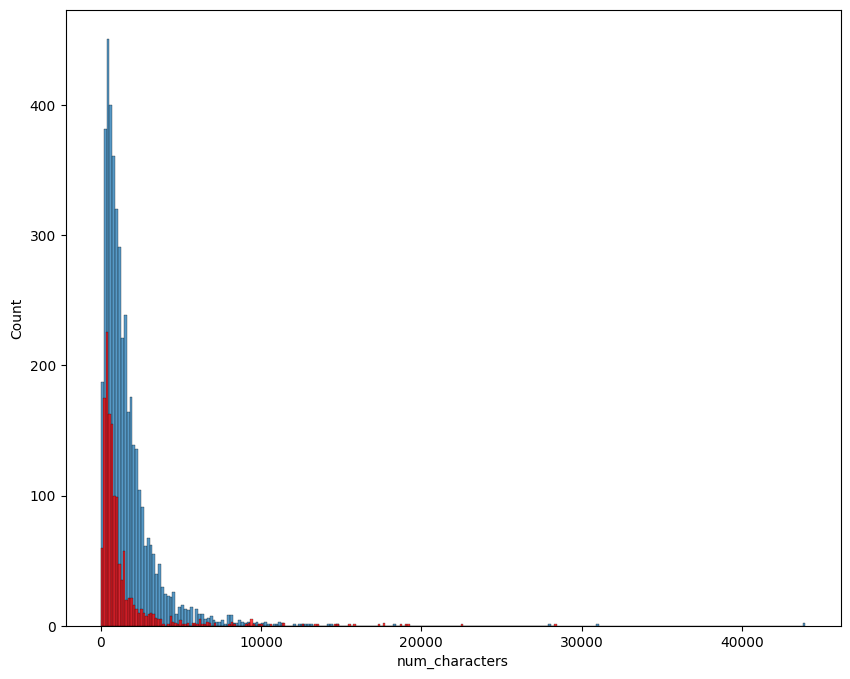

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(df[df['spam'] == 0]['num_characters'])
sns.histplot(df[df['spam'] == 1]['num_characters'],color='red')
plt.show()

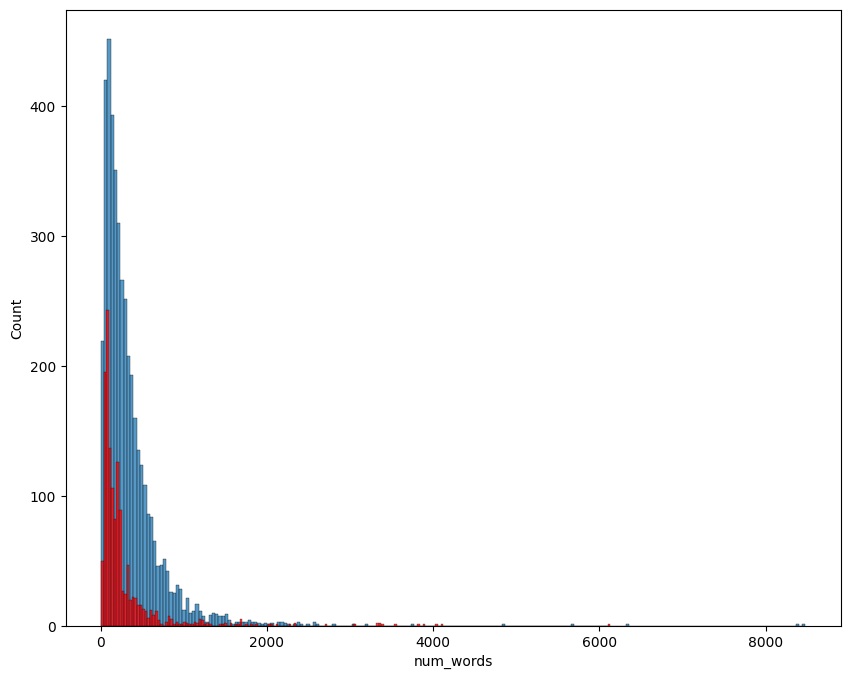

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['spam'] == 0]['num_words'])
sns.histplot(df[df['spam'] == 1]['num_words'],color='red')
plt.show()

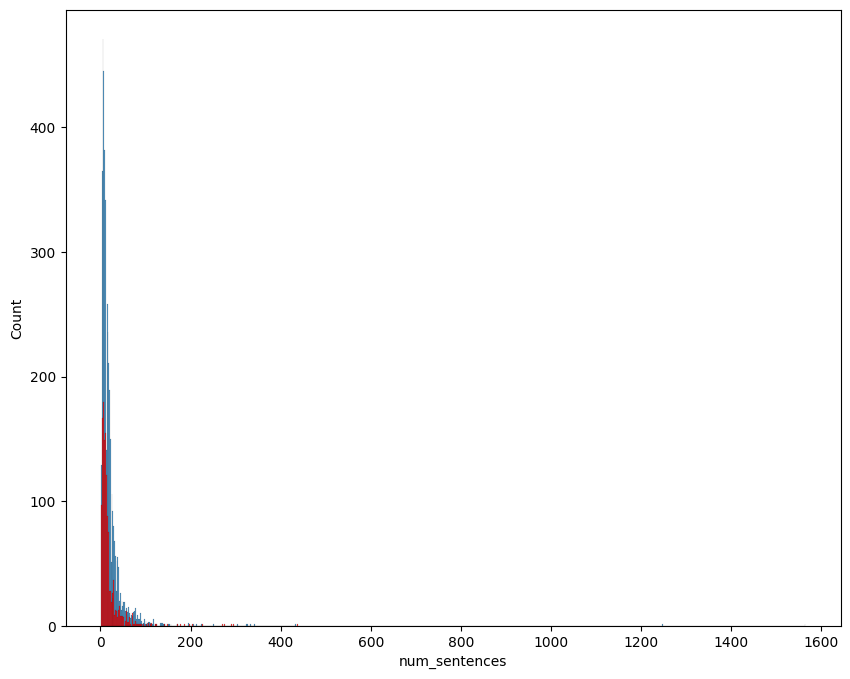

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['spam'] == 0]['num_sentences'])
sns.histplot(df[df['spam'] == 1]['num_sentences'],color='red')
plt.show()

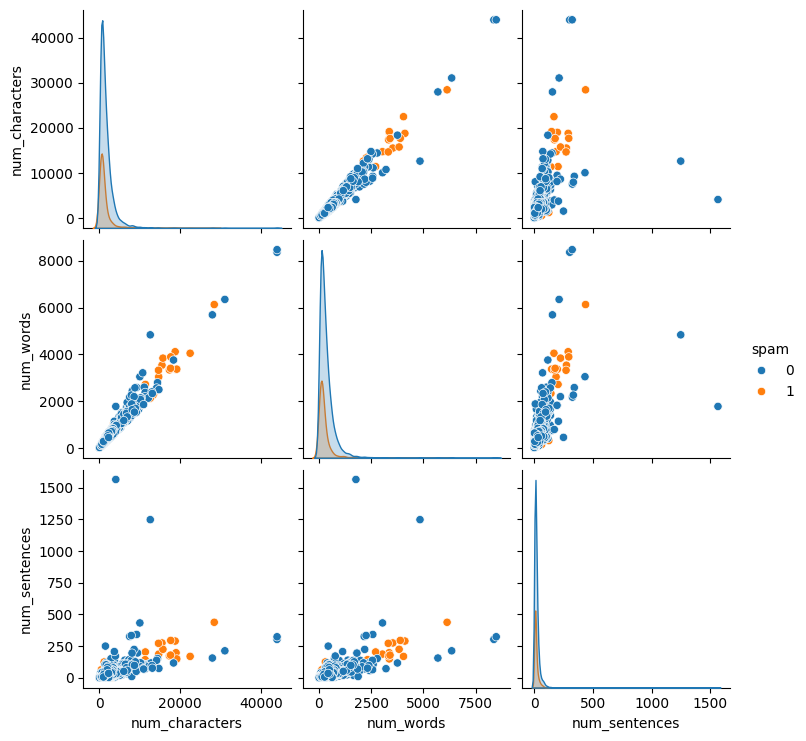

In [ ]:
#Pairplot
sns.pairplot(df,hue='spam')
plt.show()

<Axes: xlabel='spam', ylabel='num_characters'>

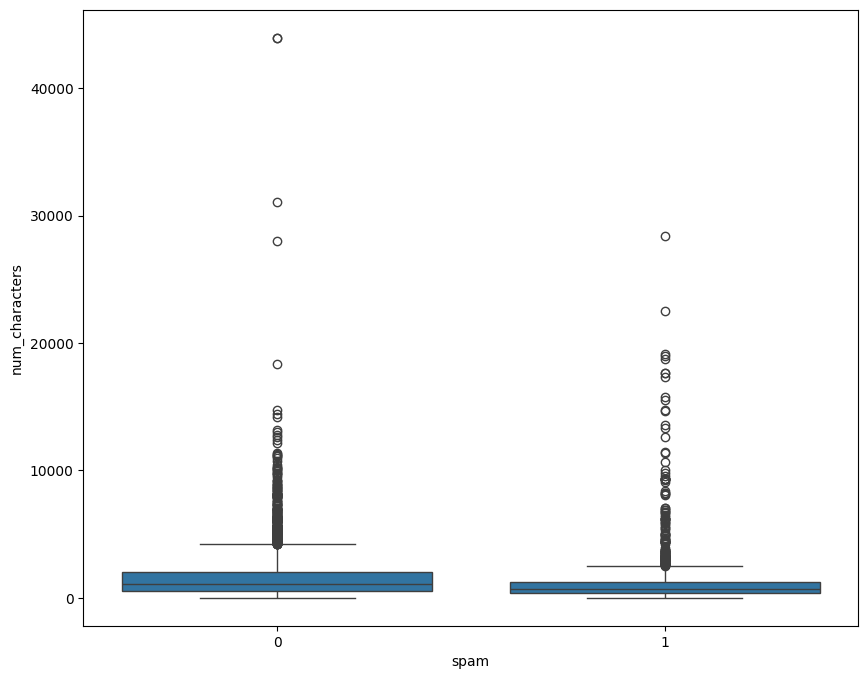

In [ ]:
#Boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='spam',y='num_characters',data=df)

**3. Data Preprocessing**
1. Lowercase
2. Tokenization
3. Removing Special Character
4. Removing stop words and punctuation
5. stemming

In [ ]:
# let's do data preprocessing like remove punctucation, stopwords, stemming.
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)

    return " ".join(y)

In [ ]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

'love yt lectur machin learn dace danc danc'

In [ ]:
#transformed text column
df['transformed_text'] = df['text'].apply(text_processing)

<ipython-input-28-06548c258f8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(text_processing)


In [ ]:
df.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

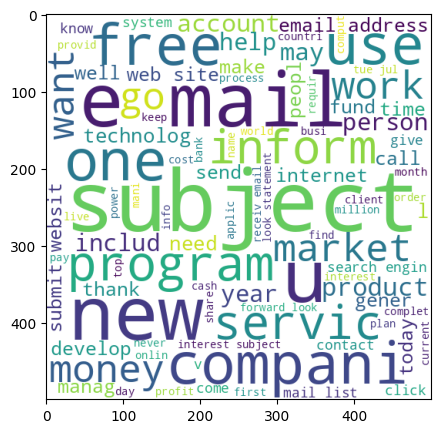

In [ ]:
## Spam Word Cloud
spam_wc = wc.generate(df[df['spam'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc)
plt.show()

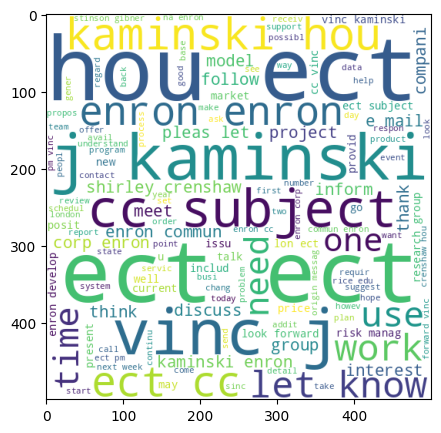

In [ ]:
## Ham Word Cloud
ham_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham_wc)
plt.show()

In [ ]:
## Converting Spam Messages to List of Words
x = df[df['spam'] == 1]['transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

174630

In [ ]:
## Counting Top 30 Words from spam messages
from collections import Counter
spam_top_30words = pd.DataFrame(Counter(spam_msg_word_list).most_common(30))

In [ ]:
spam_top_30words

,0,1
0,subject,1577
1,compani,1065
2,com,1000
3,1,952
4,mail,917
5,busi,897
6,email,865
7,inform,818
8,receiv,727
9,e,701


In [ ]:
## List of the Total Ham Words

ham_msg_list = df[df['spam'] == 0]['transformed_text'].tolist()
ham_msg_word_list = []

for i in ham_msg_list:
    for j in i.split():
        ham_msg_word_list.append(j)

In [ ]:
## Converting Most Comman 30 WOrds to DataFrame
ham_top_30words = pd.DataFrame(Counter(ham_msg_word_list).most_common(30))
ham_top_30words.head()

,0,1
0,enron,13335
1,ect,11410
2,subject,8565
3,vinc,8468
4,hou,5567


**4. Model Building**

In [ ]:
## First of all We have to Convert Our text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tf.fit_transform(df['transformed_text']).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12309023, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y = np.array(df['spam'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [ ]:
X_train.shape

(3986, 3000)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
def model_scoring(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    con_matrix = confusion_matrix(y_test,pred)
    pre_score = precision_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    return acc_score,con_matrix,pre_score,f1score

In [ ]:
model_scoring(gnb,X_train,X_test,y_train,y_test)

(0.9654768870684611,
 array([[1286,   12],
        [  47,  364]]),
 0.9680851063829787,
 0.9250317662007624)

In [ ]:
model_scoring(bnb,X_train,X_test,y_train,y_test)

(0.957284961966062,
 array([[1225,   73],
        [   0,  411]]),
 0.8491735537190083,
 0.918435754189944)

In [ ]:
model_scoring(mnb,X_train,X_test,y_train,y_test)

(0.981275599765945,
 array([[1292,    6],
        [  26,  385]]),
 0.9846547314578005,
 0.9600997506234414)

In [ ]:
from sklearn.model_selection import StratifiedKFold
sss = StratifiedKFold(n_splits=8)

In [ ]:
mnb_pre = []
gnb_pre = []
bnb_pre = []
mnb_acc = []
gnb_acc = []
bnb_acc = []
etc_acc = []


for train_index,test_index in sss.split(X,y):
    X_trai,X_tes = X[train_index],X[test_index]
    y_trai,y_tes = y[train_index],y[test_index]

    acc1,con1,pre1,f1 = model_scoring(mnb,X_trai,X_tes,y_trai,y_tes)
    acc2,con2,pre2,f1 = model_scoring(gnb,X_trai,X_tes,y_trai,y_tes)
    acc3,con3,pre3,f1 = model_scoring(bnb,X_trai,X_tes,y_trai,y_tes)

    mnb_pre.append(pre1)
    gnb_pre.append(pre2)
    bnb_pre.append(pre3)

    mnb_acc.append(acc1)
    gnb_acc.append(acc2)
    bnb_acc.append(acc3)

In [ ]:
print(mnb_pre)
print(gnb_pre)
print(bnb_pre)

[0.9757575757575757, 0.9763313609467456, 0.9753086419753086, 0.9821428571428571, 0.9760479041916168, 0.9593023255813954, 0.9764705882352941, 0.9647058823529412]
[0.9607843137254902, 0.9580838323353293, 0.9675324675324676, 0.9818181818181818, 0.9622641509433962, 0.9386503067484663, 0.9454545454545454, 0.9936708860759493]
[0.7981220657276995, 0.7953488372093023, 0.794392523364486, 0.8028169014084507, 0.7990654205607477, 0.8142857142857143, 0.835820895522388, 0.8056872037914692]


**Now we are Going to Check some other Model Also**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs= {
    'LR':lg,
    'SVM':sv,
    'MNB':mnb,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
    'XGB':xgb
}
clfs

{'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'SVM': SVC(gamma=1.0, kernel='sigmoid'),
 'MNB': MultinomialNB(),
 'DTC': DecisionTreeClassifier(max_depth=5),
 'KNN': KNeighborsClassifier(),
 'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'ABC': AdaBoostClassifier(random_state=2),
 'BG': BaggingClassifier(n_estimators=50, random_state=2),
 'GBC': GradientBoostingClassifier(n_estimators=50, random_state=2),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=Non

In [ ]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = accuracy_score(y_test,pr)
    pre_score = precision_score(y_test,pr)

    return acc_score,pre_score

In [ ]:
# model evaluations
acc_score = []
pre_score = []

for name,clf in clfs.items():
    current_score,current_precision = score_prediction(clf,X_train,X_test,y_train,y_test)

    acc_score.append(current_score)
    pre_score.append(current_precision)

In [ ]:
acc_score

[0.978349912229374,
 0.9923932124049152,
 0.981275599765945,
 0.9163253364540667,
 0.9806904622586308,
 0.9836161497952018,
 0.9871269748390872,
 0.9713282621416033,
 0.9689877121123464,
 0.9584552369806905,
 0.9847864248098304]

In [ ]:
pre_score

[0.9605911330049262,
 0.9853658536585366,
 0.9846547314578005,
 0.7701612903225806,
 0.9725,
 0.9872773536895675,
 0.9974424552429667,
 0.9617346938775511,
 0.92018779342723,
 0.9521276595744681,
 0.9550827423167849]

In [ ]:
# mnb,etc are the best Models For Our Data and Now we will try to Improve Performance of them
from sklearn.ensemble import VotingClassifier
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [ ]:
score_prediction(mnb,X_train,X_test,y_train,y_test)

(0.981275599765945, 0.9846547314578005)

In [ ]:
score_prediction(etc,X_train,X_test,y_train,y_test)

(0.9871269748390872, 0.9974424552429667)

In [ ]:
# Let's use Ensemle technique like Voting Classifier
voting = VotingClassifier(estimators=[('mnb',mnb),('rfc',rfc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9882972498537156
0.9875311720698254


In [ ]:
# function to do model evaluation
voting_pre = []
voting_acc = []

for train_index,test_index in sss.split(X,y):
    X_trai,X_tes = X[train_index],X[test_index]
    y_trai,y_tes = y[train_index],y[test_index]

    acc,con,pre,f = model_scoring(voting,X_trai,X_tes,y_trai,y_tes)

    voting_pre.append(pre)
    voting_acc.append(acc)


In [ ]:
print(voting_pre)
print(voting_acc)

[0.9877300613496932, 1.0, 0.9763313609467456, 1.0, 0.9880239520958084, 0.9824561403508771, 0.9882352941176471, 0.9940476190476191]
[0.9831460674157303, 0.9943820224719101, 0.9859550561797753, 0.9929775280898876, 0.9887640449438202, 0.9915730337078652, 0.9929775280898876, 0.9929676511954993]
